Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech </a>.

<div class="jumbotron">
  <h1 class="display-4">User defined functions</h1>
  <p class="lead">Functions defined by the user (that are not available in the standard python library or other external modules) are called use defined functions. In this chapter, we will discuss how to create user defined functions, how to pass parameters and get return values back from the function etc.</p>
  <hr>
  <h3 class="display-6"> Contents </h3>

  <ul style="list-style-type:none">
    <li> <a href="#User-defined-Functions"> &#10070; What is a user defined functions </a> </li>
     <li> <a href="#docstring"> &#10070; docstring </a> </li>
      <li> <a href="#Variable-Scope"> &#10070; Variable Scope </a> </li>
      <li> <a href="#Arguments"> &#10070; Arguments </a> </li>      
       <ul style="list-style-type:none">
           <li> <a href="#Required-Arguments"> &#9656; Required Arguments </a> </li>
           <li> <a href="#Named-Arguments"> &#9656; Named Arguments </a> </li>
           <li> <a href="#Default-Arguments"> &#9656; Default Arguments </a> </li>
           <li> <a href="#Variable-Arguments"> &#9656; Variable number of arguments </a> </li>           
      </ul>
  </ul>
</div>



<hr>

<div class="alert alert-secondary" id="User-defined-Functions">    
    <span class="topic"> &#10070; What is a user defined functions</span>   
</div>

Let's take a simple task - Calculate the interest on the balance in your bank account since the beginning of the year. In order to do that, you first need 3 things

- account balance
- interest rate
- days since Jan 1st of the current year

<div class="text-center">
    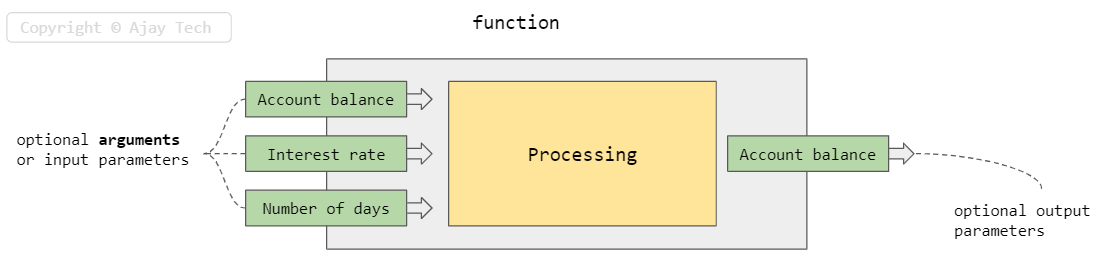
</div>    

In [20]:
def calculate_interest(balance,interest,days) :
    
    interest_amount = balance * ( interest / 100 ) * ( days/365 )
    
    return interest_amount

<div class="text-center">
    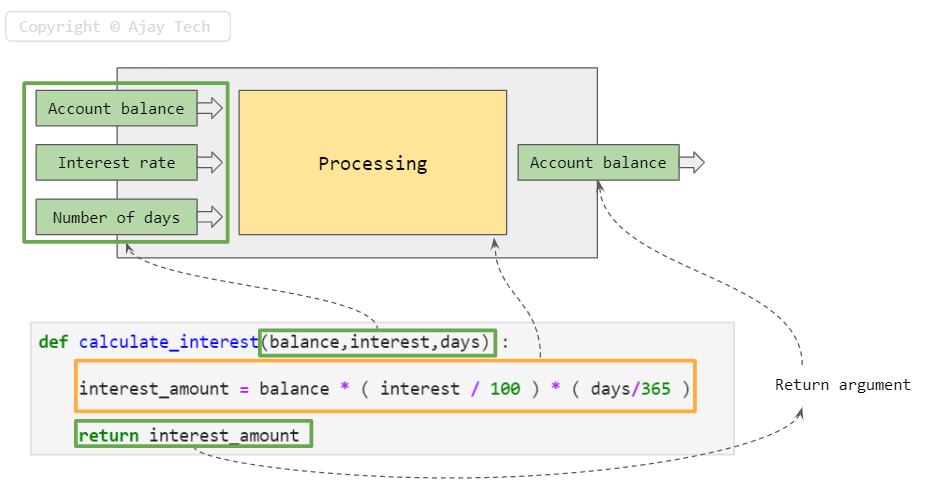
</div>    

To call the function, all you have to do is to just follow the signature of the function. 

In [3]:
interest_amount = calculate_interest(1200,10,100)
print ( interest_amount )

32.87671232876712


Think of functions as essentially outsourcing the processing to a different place. In a large project, each developer works on developing his/her own piece of logic. Eventually, all of them need to be linked together. Functions provide the most fundamental way in which logic can be clealy separated. Ofcourse, there are other things like modules, libraries etc that do the same at a much higher level, but that is a topic for another day. 

Now, since the logic is separated into a separate function, the developer writing the function has to provide some kind of documentation on how to use the function. For example, in this case, the developer would have to provide some basic info on how to pass the arguments. For example, should the interest rate be passed as a percentage or value. How should the days be calculated - since the beginning of the fiscal year or the beginning of financial year etc.

In order to do this, python provides something called as a docstring.

<hr>

<div class="alert alert-secondary" id="docstring">    
    <span class="topic"> &#10070; docstring</span>   
</div>

docstring is a simple way to provide documentation on the function. It can also be used for providing documentation on classes of modules as we will see when we get to them. Providing a docstring in a function is very simple - just provide the text enclosed in **triple quotes**.

<div class="text-center">
    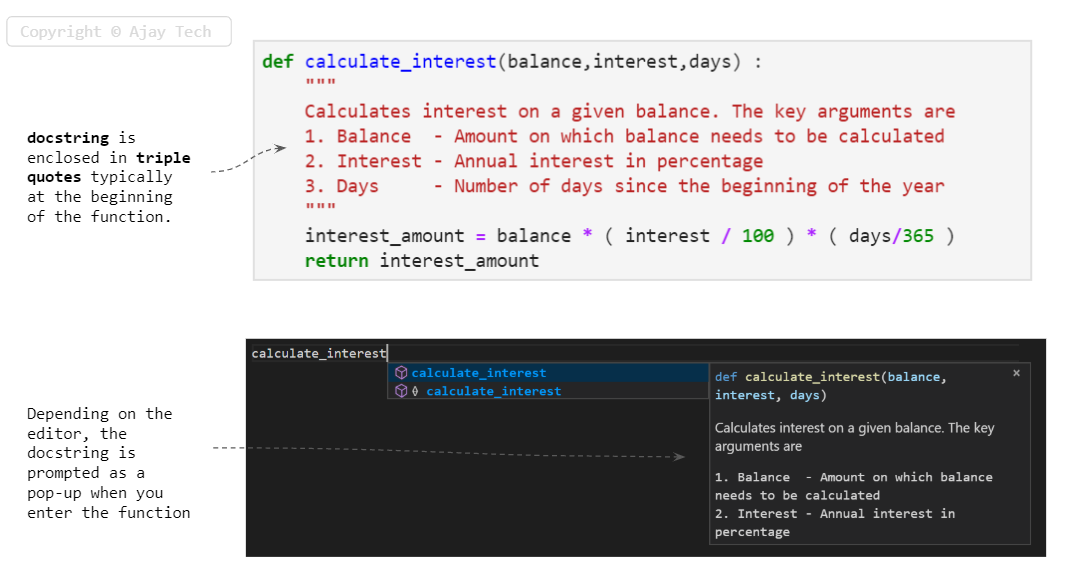
</div>

In [8]:
def calculate_interest(balance,interest,days) :
    """
    Calculates interest on a given balance. The key arguments are
    1. Balance  - Amount on which balance needs to be calculated
    2. Interest - Annual interest in percentage
    3. Days     - Number of days since the beginning of the year
    """
    interest_amount = balance * ( interest / 100 ) * ( days/365 )
    return interest_amount

In [20]:
calculate_interest

<function __main__.calculate_interest(balance, interest, days)>

<div class="text-center">
    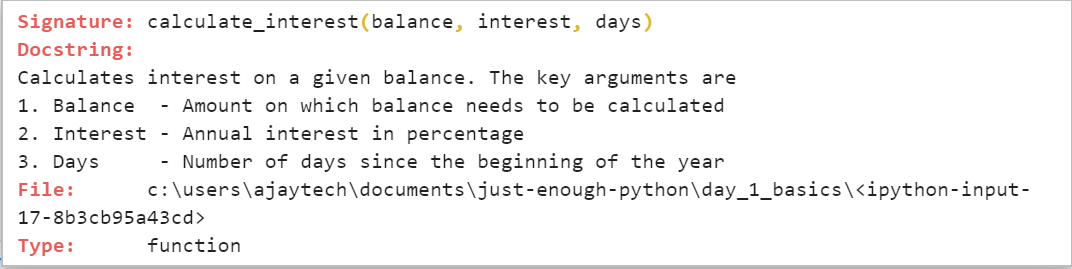
</div>

You can also get the same programmatically using the __doc__ function.

In [12]:
print ( calculate_interest.__doc__ )


    Calculates interest on a given balance. The key arguments are
    1. Balance  - Amount on which balance needs to be calculated
    2. Interest - Annual interest in percentage
    3. Days     - Number of days since the beginning of the year
    


<hr>

<div class="alert alert-secondary" id="Arguments">    
    <span class="topic"> &#10070; Arguments</span>   
</div>

Arguments are how the function receives information from the caller. There are many variations in the way the arguments can be passed. For example, you can
- specify mandatory arguments
- pass default values to arguments
- have variable number of arguments and so on. 

Let's discvoer each of these variations.

<div class="alert alert-light" id="Required-Arguments">    
    <span class="topic"> &#9656; Required Arguments</span>   
</div>

Most of the times some of the arguments to a function are required and some are not. Let's take the **calculate_interest** example that we have seen above. There are 3 arguments. 

In [8]:
def calculate_interest(balance,interest,days) :
    
    interest_amount = balance * ( interest / 100 ) * ( days/365 )
    
    return interest_amount

What happens when you call the function with just 2 arguments ? Python throws a **TypeError**. 

In [22]:
interest_amount = calculate_interest(1000, 5)

TypeError: calculate_interest() missing 1 required positional argument: 'days'

When you don't specify argument names, the position of the arguments is important. 

<div class="text-center">
    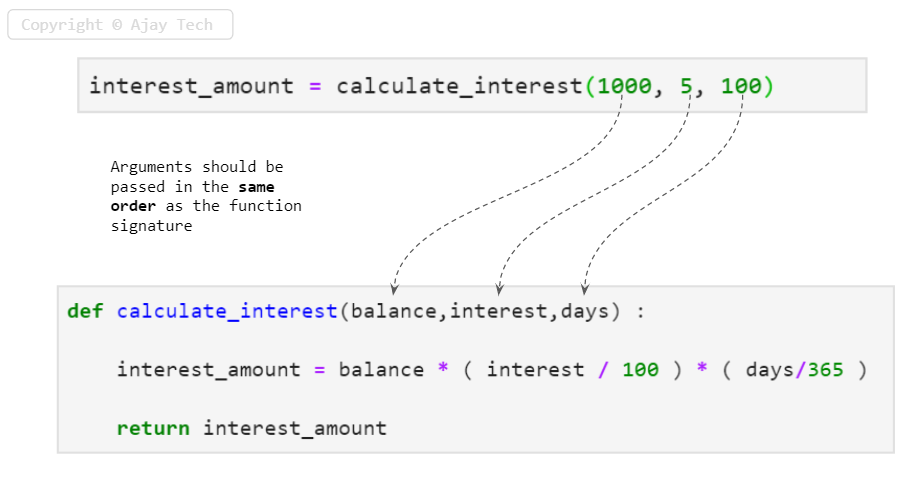
</div>

In [26]:
interest_amount = calculate_interest(1000, 5,100)

<div class="alert alert-light" id="Named-Arguments">    
    <span class="topic"> &#9656; Named Arguments</span>   
</div>

Named arguments can be passed in any order you like - as long as you specify the argument name Python does the matching automatically. 

<div class="text-center">
    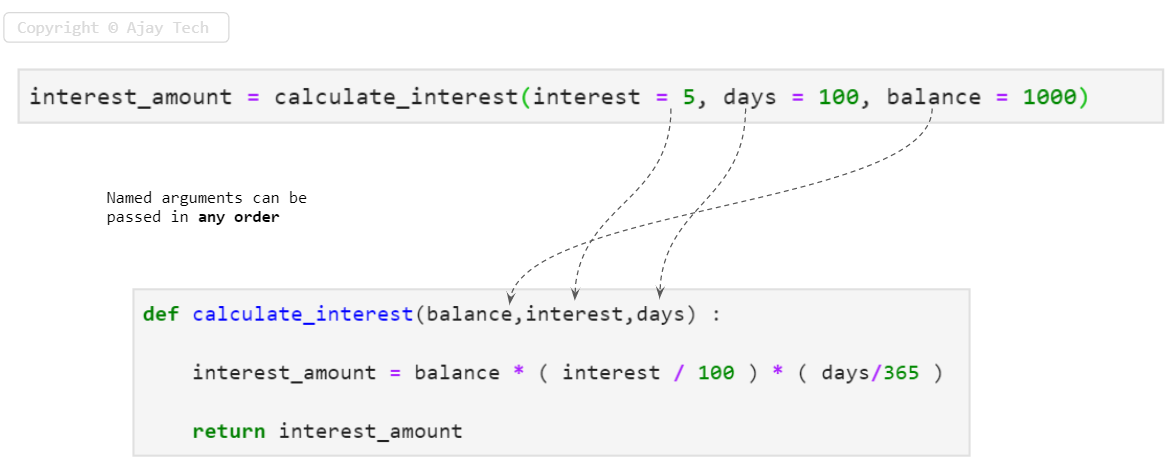
</div>

In [25]:
interest_amount = calculate_interest(interest = 5, days = 100, balance = 1000)

This would result in the sa

The reason is because, unless specified otherwise, all arguments to a function are mandatory. Sometimes, to simplify things, we might make it easy on the user of the function to default an argument to a fixed value. 

<div class="alert alert-light" id="Default-Arguments">    
    <span class="topic"> &#9656; Default Arguments</span>   
</div>

Say, the interest rate is 5% unless specified otherwise. This is how we would define that function.

In [11]:
def calculate_interest (balance,interest = 5,days) :
    
    interest_amount = balance * ( interest / 100 ) * ( days/365 )
    
    return interest_amount

SyntaxError: non-default argument follows default argument (<ipython-input-11-c745ff0a87a1>, line 1)

That didn't seem to work, right ? What python is saying is that default arguments should be specified at the end (before the non-default argument begins). In this case, specify the _days_ argument before the _interest_ argument.

In [12]:
def calculate_interest (balance,days, interest = 5) :
    
    interest_amount = balance * ( interest / 100 ) * ( days/365 )
    
    return interest_amount

Now, if we call the function, we don't need to pass the argument for _interest_. 

In [14]:
interest_amount = calculate_interest(1200, 100)
interest_amount

16.43835616438356

However, if you want, you can very well pass the argument for interest as well. The function works either way. Very convenient, isn't it ? 

A good example for this is the **print** function. Look at the signature of it. 

<pre>
print(*objects, sep=' ', end='\n', file=sys.stdout, flush=False)
</pre>

The arguments for separator (sep), end of line (end), output stream (file) etc are all defaulted to some values so that you don't have to specify them everytime. However, you can very well send them in based on your requirements. For example, if you don't want the newline to be printed for everytime the print function is used, send in a blank for the _end_ argument. 

In [17]:
print ( "Ajay", end="")
print ( "Tech")

AjayTech


If not for that, this is how the default behaviour would look like. 

In [19]:
print ( "Ajay")
print ( "Tech")

Ajay
Tech


<div class="alert alert-light" id="Variable-Arguments">    
    <span class="topic"> &#9656; Variable number of Arguments</span>   
</div>

The print function is a good example of a function with variable number of arguments. It can take as many strings as you want and still print all of them sequentially. 

<div class="text-center">
    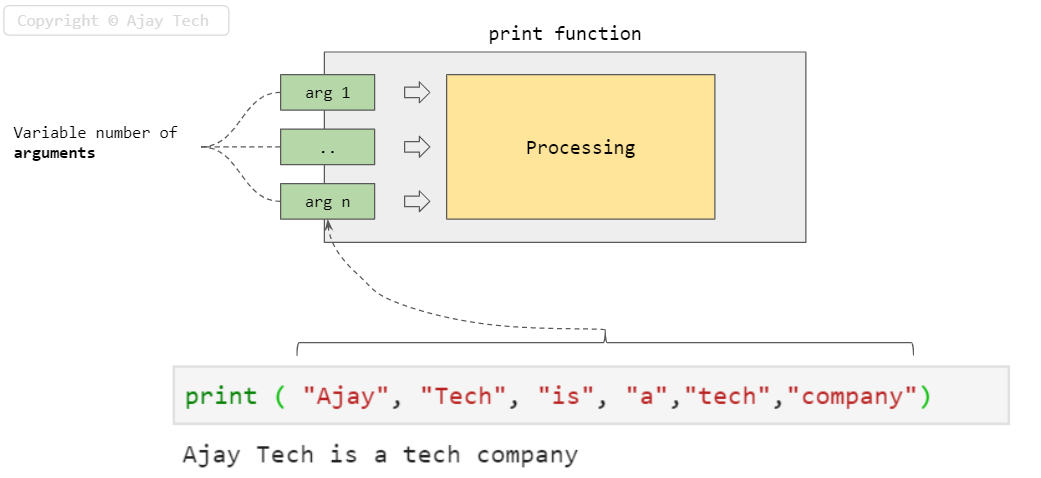
</div>

In [3]:
print ( "Ajay", "Tech", "is", "a","tech","company")

Ajay Tech is a tech company


The way to define a function like this is by using a star ( __*__ ) before the parameter name.  Here is an example of a function that takes in a variable number of grades and computes the average of them. 

In [4]:
def avg_grade(*grades) :
    
    i   = 0
    sum = 0.0
    for grade in grades :
        sum = sum + grade
        i   = i + 1
    
    avg = sum / i
    return avg

In [7]:
avg = avg_grade(2.5,3.0,3.5) # as many arguments as you like
avg

3.0

Internally, python takes in these arguments as a tuple. We will discuss <a href="https://ajaytech.co/python-tuples">tuples in python</a> in a later section.

In [2]:
# import bootstrap
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen("https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/css/bootstrap.min.css")
HTML('<style>' + html.read().decode('utf-8') + '</style>')
# bootstrap_icons = urlopen("https://cdn.jsdelivr.net/npm/bootstrap-icons@1.4.0/font/bootstrap-icons.css")
# HTML('<style>' + bootstrap_icons.read().decode('utf-8') + '</style>')

In [3]:
# Custom css classes for text highlighting (based on bootstrap.css)

from IPython.core.display import HTML
HTML("""
<style>

kbd { 
    background-color : black !important; 
    font-size : unset !important
}

.yellow { 
    background-color : #fff3cd !important; 
    color : black !important 
}

code { 
    border-radius : .2rem;
    background-color : white !important;
    border : solid 1px black !important
}

.jumbotron {
    background-color : #e9ecef;
    padding : 2rem 1rem;
    border-radius :.3rem
}

.list-group-flush {
    background-color : #e2e3e5 !important;
    padding-left : 0em !important;
}

.list-group-item {
    background-color : #e2e3e5; !important;
}

img {
    box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19) !important;
}

.bookmark {
    box-shadow : none !important;
    padding-bottom : .5rem !important;
}

.topic {
    font-size : 1.25rem !important;
}

.alert-info {
    background-color : #d1ecf1 !important;
    border-color : #bee5eb !important;
}

</style>
""")

In [3]:
# Make the notebook printer friendly by removing the prompts at the left of the code sections.
from IPython.core.display import HTML
HTML("""
<style>

.prompt { display : none;  } 

.jp-InputPrompt {
    color : white !important;
}

.jp-InputArea-prompt {
    color : white !important;
}
.jp-OutputPrompt{
    color : white !important;
}
.jp-OutputArea-prompt{
    color : white !important;
}

</style>
""")